In [1]:
import sys
import os

# Add the source directory to sys.path
ROOT = os.path.abspath("..")  # notebook is in notebooks/, ROOT points to project root
SRC_DIR = os.path.join(ROOT, "code")
sys.path.insert(0, SRC_DIR)

In [2]:
from bayesian_i import *

In [3]:
def run_analyis(R, P, u, 
                R_err_upr, R_err_lwr, 
                P_err_upr, P_err_lwr, 
                u_err_upr, u_err_lwr, 
                cosi_grid=np.linspace(0.01, 0.99, 200), 
                plot=False, name=None):
    
    v = get_velocity(R, P)
    v_err_upr = get_sig_velocity(R, P, R_err_upr, P_err_upr)
    v_err_lwr = np.abs(get_sig_velocity(R, P, R_err_lwr, P_err_lwr))
    print(v, v_err_upr, v_err_lwr)

    posterior = get_cosi([v], u, 
                         [v_err_lwr], [v_err_upr], 
                         np.abs(u_err_lwr), u_err_upr, 
                         plot=plot, name=name, cosi_grid=cosi_grid)

    i_med, i_lwr, i_upr = get_i(posterior, plot=plot, 
                                cosi_grid=cosi_grid)

    return i_med, i_lwr, i_upr

3.683935588496978 0.16987389521741264 0.11432929732616053


100%|██████████| 200/200 [02:15<00:00,  1.48it/s]


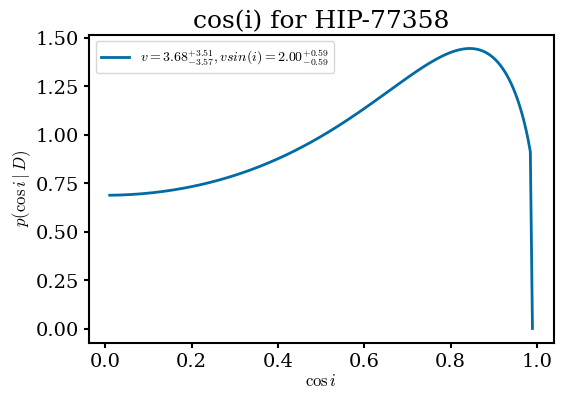

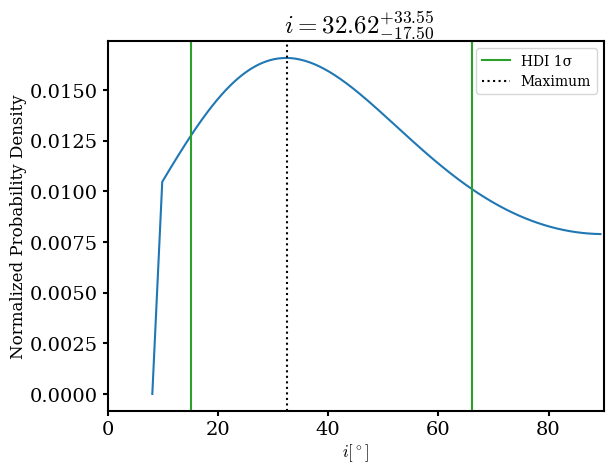

6.257761886472183 0.1638208774114724 0.20072558056460627


100%|██████████| 200/200 [01:40<00:00,  1.98it/s]


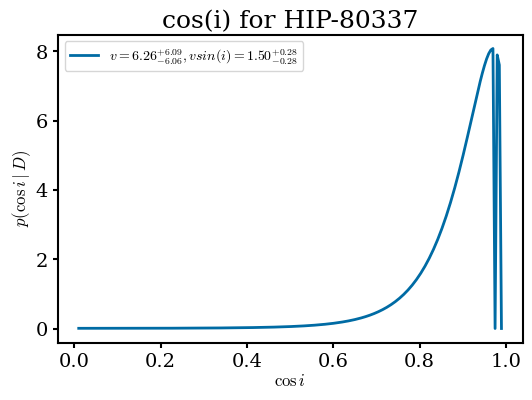

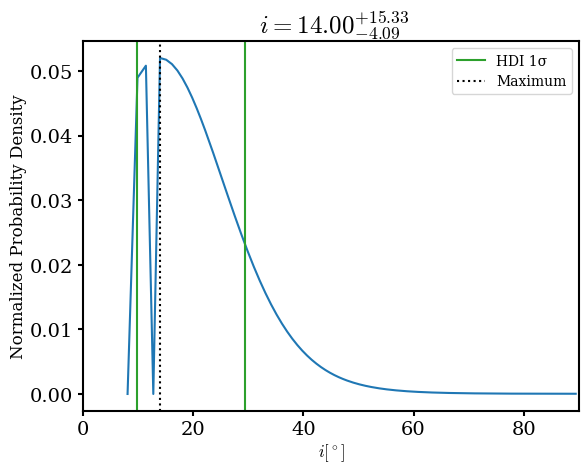

10.488697768920838 0.5285740668113597 0.49183918958122647


100%|██████████| 200/200 [01:43<00:00,  1.93it/s]


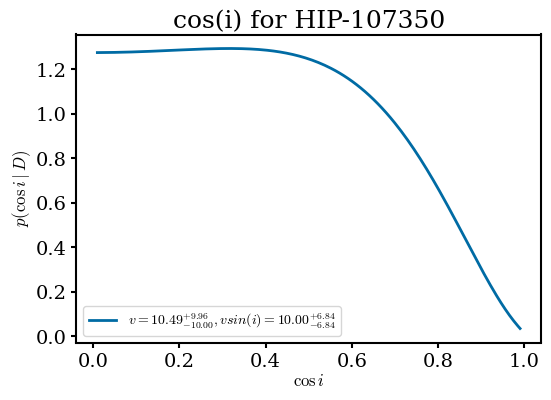

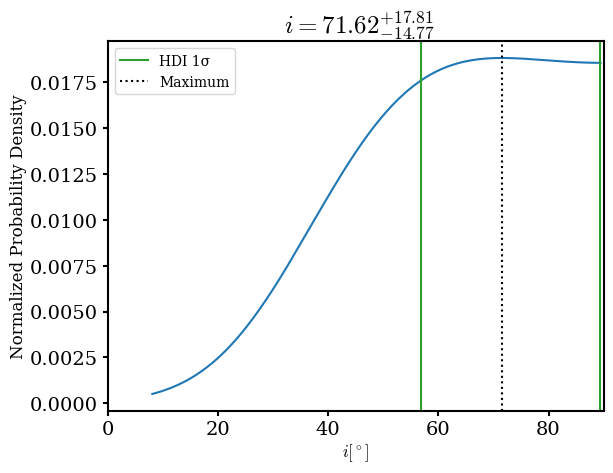

34.47397181083199 4.217233638260524 4.309413608495727


100%|██████████| 200/200 [01:40<00:00,  1.99it/s]


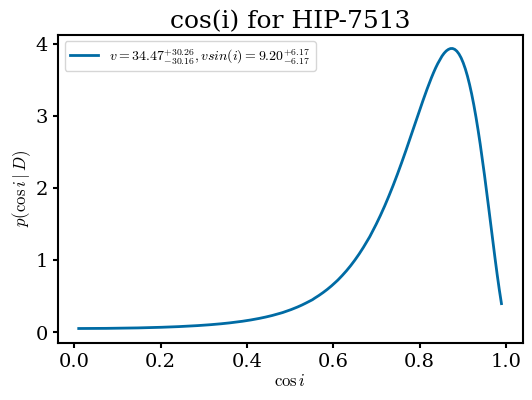

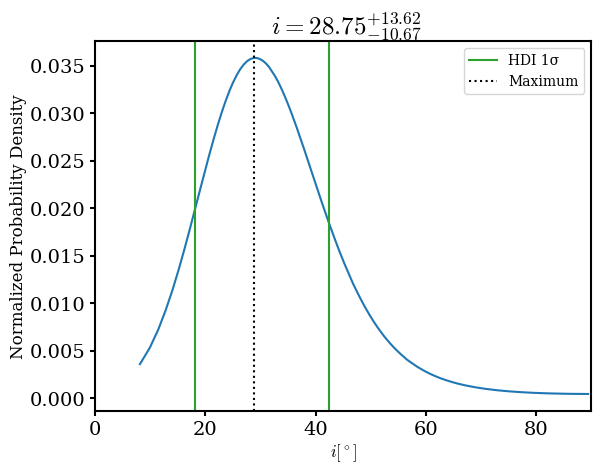

In [4]:
import pandas as pd

df = pd.read_csv(ROOT + '/data/extracted_filtered.csv')

i_med_arr, i_lwr_arr, i_upr_arr = [], [], []

for idx, row in df.iterrows():
    solar_r = 695700 #km
    seconds = 24*60*60 #s
    # Extract values and replace NaN with 0
    R = row['R']*solar_r if not pd.isna(row['R']) else 0
    P = row['P_avg']*seconds if not pd.isna(row['P_avg']) else 0
    u = row['vsini'] if not pd.isna(row['vsini']) else 0 # already in km/s

    R_err_upr = row['R_err_upr']*solar_r if not pd.isna(row['R_err_upr']) else 0
    R_err_lwr = row['R_err_lwr']*solar_r if not pd.isna(row['R_err_lwr']) else 0

    P_err_upr = row['P_err']*seconds if not pd.isna(row['P_err']) else 0
    P_err_lwr = P_err_upr # if you have lower error, replace with row['P_err_lwr']

    u_err_upr = np.sqrt(u) #row['vsini_err_upr'] if not pd.isna(row['vsini_err_upr']) else 0
    u_err_lwr = np.sqrt(u) #row['vsini_err_lwr'] if not pd.isna(row['vsini_err_lwr']) else 0

    name = row['HIP_ID']

    i_med, i_lwr, i_upr = run_analyis(
        R, P, u,
        R_err_upr, R_err_lwr,
        P_err_upr, P_err_lwr,
        u_err_upr, u_err_lwr,
        plot=True,
        name=name
    )

    i_med_arr.append(i_med)
    i_lwr_arr.append(i_lwr)
    i_upr_arr.append(i_upr)
